# Rejection ABC
This example shows you how to perform rejection ABC on a time series from the stochastic degradation model.


In [1]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.StochasticDegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 100)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior([0.0], [0.3])


# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

## Fit using Rejection ABC

In [2]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(1)

# set target number of samples
abc.set_nr_samples(200)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     40     0.025            0:00.0
2     56     0.0357142857     0:00.0
3     84     0.0357142857     0:00.0
20    879    0.0227531286     0:00.3
40    1864   0.0214592275     0:00.6
60    2591   0.0231570822     0:00.8
80    3392   0.0235849057     0:01.0
100   4361   0.0229305205     0:01.3
120   5177   0.0231794476     0:01.5
140   6446   0.0217188954     0:01.8
160   7379   0.0216831549     0:02.0
180   8424   0.0213675214     0:02.3
200   9347   0.0213972398     0:02.6
Halting: target number of samples (200) reached.
Done


## Plot approximate posterior vs actual parameter value

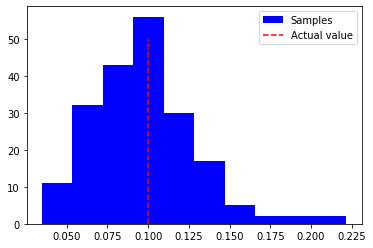

In [3]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=50, label="Actual value", color="red")
plt.legend()
plt.show()